# Introduction

This project uses data from datasets containing gold and silver prices to display the fluctuations throughout the years, as well as a section that shows the prices changes for one month. No fancy comparisons, only displays data to study the correlation between gold and silver prices.

The dataset was obtained from www.kaggle.com. (https://www.kaggle.com/datasets/lbronchal/gold-and-silver-prices-dataset?resource=download&select=silver_price.csv)

www.kaggle.com per LBMA Precious Metal Prices

Prices are per ounce in USD.

It contains 2 files"
gold_price.csv,
silver_price.csv



# 1 Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 2. Import CSV Files/DataSets

In [2]:
df = pd.read_csv('gold_price.csv')
df2 = pd.read_csv('silver_price.csv')

In [3]:
#print datasets to check data
df, df2

(             date    price
 0      1968-01-02      NaN
 1      1968-01-03      NaN
 2      1968-01-04      NaN
 3      1968-01-05      NaN
 4      1968-01-08      NaN
 ...           ...      ...
 13456  2021-03-30  1683.95
 13457  2021-03-31  1691.05
 13458  2021-04-01  1726.05
 13459  2021-04-06  1744.65
 13460  2021-04-07  1738.05
 
 [13461 rows x 2 columns],
              date   price
 0      1968-01-02   2.173
 1      1968-01-03   2.225
 2      1968-01-04   2.171
 3      1968-01-05   2.157
 4      1968-01-08   2.163
 ...           ...     ...
 13470  2021-03-30  24.340
 13471  2021-03-31  24.000
 13472  2021-04-01  24.315
 13473  2021-04-06  25.040
 13474  2021-04-07  24.985
 
 [13475 rows x 2 columns])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13461 entries, 0 to 13460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    13461 non-null  object 
 1   price   13320 non-null  float64
dtypes: float64(1), object(1)
memory usage: 210.5+ KB


# Data cleaning, Remove null values


In [5]:
# Check for number of null values
df.isnull().sum()

date       0
price    141
dtype: int64

In [6]:
df2.isnull().sum()

date      0
price    21
dtype: int64

In [7]:
# Removing null values
df.dropna(axis = 0)

,date,price
63,1968-04-01,37.70
64,1968-04-02,37.30
65,1968-04-03,37.60
66,1968-04-04,36.95
67,1968-04-05,37.00
...,...,...
13456,2021-03-30,1683.95
13457,2021-03-31,1691.05
13458,2021-04-01,1726.05
13459,2021-04-06,1744.65


In [8]:
# Removing null values
df2.dropna(axis = 0)

,date,price
0,1968-01-02,2.173
1,1968-01-03,2.225
2,1968-01-04,2.171
3,1968-01-05,2.157
4,1968-01-08,2.163
...,...,...
13470,2021-03-30,24.340
13471,2021-03-31,24.000
13472,2021-04-01,24.315
13473,2021-04-06,25.040


In [9]:
# Changing to datetime to use specific dates
df.date = pd.to_datetime(df.date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13461 entries, 0 to 13460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    13461 non-null  datetime64[ns]
 1   price   13320 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 210.5 KB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13475 entries, 0 to 13474
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    13475 non-null  object 
 1   price   13454 non-null  float64
dtypes: float64(1), object(1)
memory usage: 210.7+ KB


In [11]:
# Changing to datetime to use specific dates
df2.date = pd.to_datetime(df2.date)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13475 entries, 0 to 13474
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    13475 non-null  datetime64[ns]
 1   price   13454 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 210.7 KB


# Choose date to visualize between indexes

In [12]:
df = df.set_index('date')
df2 = df2.set_index('date')

In [13]:
df, df2

(              price
 date               
 1968-01-02      NaN
 1968-01-03      NaN
 1968-01-04      NaN
 1968-01-05      NaN
 1968-01-08      NaN
 ...             ...
 2021-03-30  1683.95
 2021-03-31  1691.05
 2021-04-01  1726.05
 2021-04-06  1744.65
 2021-04-07  1738.05
 
 [13461 rows x 1 columns],
              price
 date              
 1968-01-02   2.173
 1968-01-03   2.225
 1968-01-04   2.171
 1968-01-05   2.157
 1968-01-08   2.163
 ...            ...
 2021-03-30  24.340
 2021-03-31  24.000
 2021-04-01  24.315
 2021-04-06  25.040
 2021-04-07  24.985
 
 [13475 rows x 1 columns])

In [14]:
# Creating datasets for specific years
gold = df.loc['2000-01-04':'2021-04-07']

In [15]:
gold



,price
date,
2000-01-04,281.50
2000-01-05,280.45
2000-01-06,279.40
2000-01-07,282.10
2000-01-10,281.60
...,...
2021-03-30,1683.95
2021-03-31,1691.05
2021-04-01,1726.05


In [16]:
# Creating datasets for specific years
silver = df2.loc['2000-01-04':'2021-04-07']

In [17]:
silver

,price
date,
2000-01-04,5.303
2000-01-05,5.285
2000-01-06,5.140
2000-01-07,5.135
2000-01-10,5.145
...,...
2021-03-30,24.340
2021-03-31,24.000
2021-04-01,24.315


# Plotting data from whole dataset


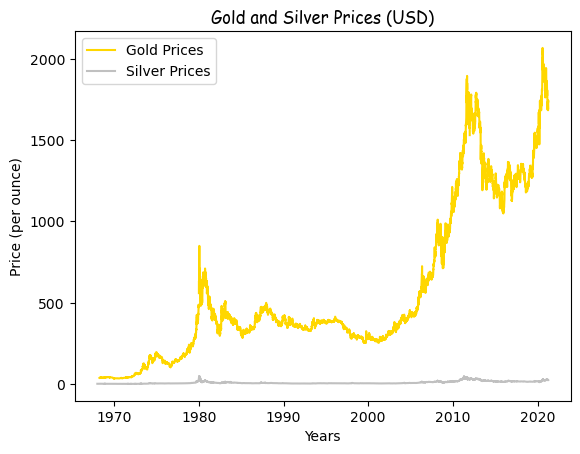

In [42]:
plt.plot(df, 'gold')
plt.plot(df2, 'silver')
plt.title("Gold and Silver Prices (USD)", fontdict={'fontname': 'Comic Sans Ms'})
plt.xlabel('Years')
plt.ylabel('Price (per ounce)')
plt.legend(["Gold Prices", "Silver Prices"])


# Plotting values betweeen indexes

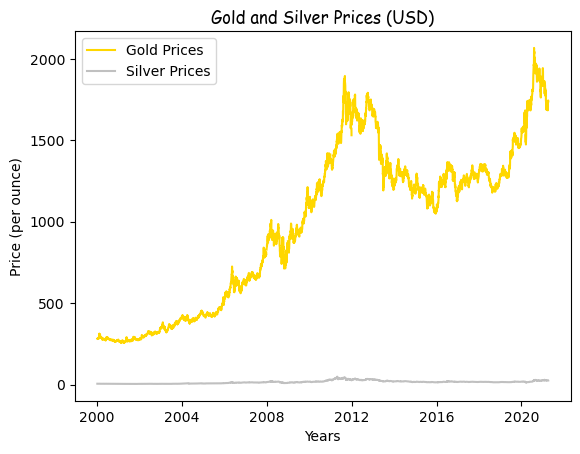

In [43]:
plt.plot(gold, 'gold')
plt.plot(silver, 'silver')
plt.title("Gold and Silver Prices (USD)", fontdict={'fontname': 'Comic Sans Ms'})
plt.xlabel('Years')
plt.ylabel('Price (per ounce)')
plt.legend(["Gold Prices", "Silver Prices"])



# Create a list from data and exploring it


In [33]:
# List from data of my January in 1980
lst = [559.50, 634.00, 588.00, 633.50, 610.00, 607.20, 602.85, 623.00, 660.00, 684.00, 760.00, 750.00, 835.00, 850.00, 737.50, 695.00, 717.00, 668.00, 624.00, 674.25, 691.00, 653.00]
gold80 = pd.DataFrame(lst)
gold80

,0
0,559.50
1,634.00
2,588.00
3,633.50
4,610.00
5,607.20
6,602.85
7,623.00
8,660.00
9,684.00


In [34]:
# Finding the mean of January prices
gold80.mean()

0    675.309091
dtype: float64

In [35]:
# Finding the median of January prices
gold80.median()

0    664.0
dtype: float64

In [36]:
# Finding the maximum price of January prices
gold80.max()

0    850.0
dtype: float64

In [37]:
# Finding the minimum of January prices
gold80.min()

0    559.5
dtype: float64

In [38]:
# Finding the length of my list
len(gold80)

22

In [39]:
# Renaming the column to price
gold80.columns = ['price']

In [40]:
# Showing the renamed column
gold80

,price
0,559.50
1,634.00
2,588.00
3,633.50
4,610.00
5,607.20
6,602.85
7,623.00
8,660.00
9,684.00


# Plotting the data from January 1980

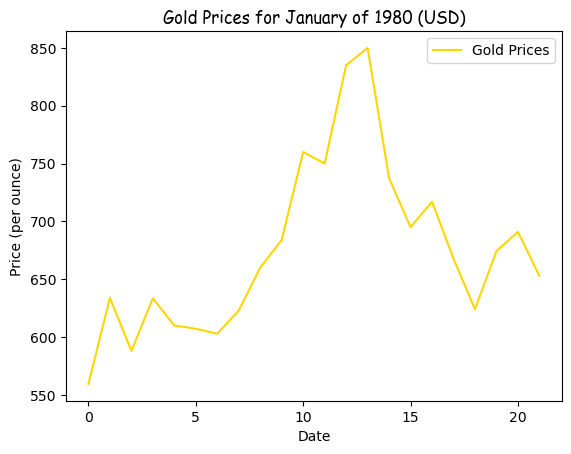

In [44]:
plt.plot(gold80, 'gold')
plt.title("Gold Prices for January of 1980 (USD)", fontdict={'fontname': 'Comic Sans Ms'})
plt.xlabel('Date')
plt.ylabel('Price (per ounce)')
plt.legend(["Gold Prices", "Silver Prices"])